## Interest Rate prediction(Time series regression)

This project will do the predictive analysis on purchase and refinance data to identify the cities and states with highest interest rate applied on loans 

# 1. Problem Definision

> Interest Rate Prediction using differnet attributes like downpayment source,purpose,property type,property state and city.


# 2. Data

>  The data available publicly from the US Department of Housing and Urban Development’s website:
https://www.hud.gov/program_offices/housing/rmra/oe/rpts/sfsnap/sfsnap


# 3. Evaluation

> we need to evaluate the RMSLE(root mean squared log error) between actual and predicted values of interest rates,Goal of the project is to build a machine learning model and compare the results in mutiple evaluation metrics like RMSLE,Mean absolute error,Mean sqaure error and the scikit learn default r-squared 

# 4. Features

> We need to find the key features which influence the results



In [1]:
# Import the # import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn 
import os
import glob

In [3]:
# Fetch the data file names using the python os library
os.chdir('Data/Training_Data')
path = os.getcwd()
files = os.listdir(path)
files

['FHA_SFSnapshot_0913.xls',
 'FHA_SFSnapshot_1012.xls',
 'FHA_SFSnapshot_1210.xls',
 'FHA_SFSnapshot_1211.xls',
 'FHA_SFSnapshot_1013.xls',
 'FHA_SFSnapshot_0912.xls',
 'FHA_SFSnapshot_0910.xls',
 'FHA_SFSnapshot_1217.xlsx',
 'FHA_SFSnapshot_1011.xls',
 'FHA_SFSnapshot_1213.xls',
 'FHA_SFSnapshot_1212.xls',
 'FHA_SFSnapshot_0715.xlsx',
 'FHA_SFSnapshot_1016.xlsx',
 'FHA_SFSnapshot_1010.xls',
 'FHA_SFSnapshot_0911.xls',
 'FHA_SFSnapshot_0216.xlsx',
 'FHA_SFSnapshot_0217.xlsx',
 'FHA_SFSnapshot_1017.xlsx',
 'FHA_SFSnapshot_1014.xls',
 'FHA_SFSnapshot_0915.xlsx',
 'FHA_SFSnapshot_1216.xlsx',
 'FHA_SFSnapshot_0914.xls',
 'FHA_SFSnapshot_1214.xls',
 'FHA_SFSnapshot_0816.xlsx',
 'FHA_SFSnapshot_1111.xls',
 'FHA_SFSnapshot_0416.xlsx',
 'FHA_SFSnapshot_0810.xls',
 'FHA_SFSnapshot_0811.xls',
 'FHA_SFSnapshot_0617.xlsx',
 'FHA_SFSnapshot_1110.xls',
 'FHA_SFSnapshot_1112.xls',
 'FHA_SFSnapshot_0813.xls',
 'FHA_SFSnapshot_0812.xls',
 'FHA_SFSnapshot_1113.xls',
 'FHA_SFSnapshot_1115.xlsx',
 'FHA_SF

In [4]:
# Define the python DataFrame and load all the files one by one using python script
df = pd.DataFrame()
for file in files:
    xls = pd.ExcelFile(file)
    #df_dict = { 'df_' + str(c) : pd.read_excel(xls, i) for c, i in enumerate(xls.sheet_names, 1)}
    df_list = [pd.read_excel(xls, i) for i in xls.sheet_names]
    
    #df = df.append(pd.DataFrame([],df_list[2], columns = ['Property State','Property City','Property County','Property Zip','Origination Mortgagee/Sponsor Originator','Originating Mortgagee Number','Sponsor Name','Sponosr Number','Down Payment Source','Non Profit Number','Product Type','Loan Purpose','Property Type','Interest Rate','Original Mortgage Amount','Endorsement  Year','Endorsement Month']), ignore_index=False)
    #df = df.append(pd.DataFrame([],df_list[3], columns = ['Property State','Property City','Property County','Property Zip','Origination Mortgagee/Sponsor Originator','Originating Mortgagee Number','Sponsor Name','Sponosr Number','Down Payment Source','Non Profit Number','Product Type','Loan Purpose','Property Type','Interest Rate','Original Mortgage Amount','Endorsement  Year','Endorsement Month']), ignore_index=False)
    
    df = df.append(pd.DataFrame(df_list[2]))
    df = df.append(pd.DataFrame(df_list[3]))
    print(df)

      Property_State Property_City Property_County  Property_Zip  \
0                 AK     ANCHORAGE       ANCHORAGE         99501   
1                 AK     ANCHORAGE       ANCHORAGE         99502   
2                 AK     ANCHORAGE       ANCHORAGE         99502   
3                 AK     ANCHORAGE       ANCHORAGE         99502   
4                 AK     ANCHORAGE       ANCHORAGE         99502   
...              ...           ...             ...           ...   
25863             WY  ROCK SPRINGS      SWEETWATER         82901   
25864             WY   GREEN RIVER      SWEETWATER         82935   
25865             WY   GREEN RIVER      SWEETWATER         82935   
25866             WY       JACKSON           TETON         83001   
25867             WY      EVANSTON           UINTA         82930   

                Originating_Mortgagee  Originating_Mortgagee_Number  \
0            RESIDENTIAL MORTGAGE LLC                       12511.0   
1                                 NaN    

      Property_State Property_City Property_County  Property_Zip  \
0                 AK     ANCHORAGE       ANCHORAGE         99501   
1                 AK     ANCHORAGE       ANCHORAGE         99502   
2                 AK     ANCHORAGE       ANCHORAGE         99502   
3                 AK     ANCHORAGE       ANCHORAGE         99502   
4                 AK     ANCHORAGE       ANCHORAGE         99502   
...              ...           ...             ...           ...   
60849             WY      EVANSTON           UINTA         82930   
60850             WY         LYMAN           UINTA         82937   
60851             WY       WORLAND        WASHAKIE         82401   
60852             WY     NEWCASTLE          WESTON         82701   
60853             WY     NEWCASTLE          WESTON         82701   

                         Originating_Mortgagee  Originating_Mortgagee_Number  \
0                     RESIDENTIAL MORTGAGE LLC                       12511.0   
1                      

      Property_State Property_City Property_County  Property_Zip  \
0                 AK     ANCHORAGE       ANCHORAGE         99501   
1                 AK     ANCHORAGE       ANCHORAGE         99502   
2                 AK     ANCHORAGE       ANCHORAGE         99502   
3                 AK     ANCHORAGE       ANCHORAGE         99502   
4                 AK     ANCHORAGE       ANCHORAGE         99502   
...              ...           ...             ...           ...   
24144             WY   GREEN RIVER      SWEETWATER         82935   
24145             WY   GREEN RIVER      SWEETWATER         82935   
24146             WY      EVANSTON           UINTA         82930   
24147             WY    BEAR RIVER           UINTA         82930   
24148             WY         UPTON          WESTON         82730   

                Originating_Mortgagee  Originating_Mortgagee_Number  \
0            RESIDENTIAL MORTGAGE LLC                       12511.0   
1                                 NaN    

      Property_State Property_City Property_County  Property_Zip  \
0                 AK     ANCHORAGE       ANCHORAGE         99501   
1                 AK     ANCHORAGE       ANCHORAGE         99502   
2                 AK     ANCHORAGE       ANCHORAGE         99502   
3                 AK     ANCHORAGE       ANCHORAGE         99502   
4                 AK     ANCHORAGE       ANCHORAGE         99502   
...              ...           ...             ...           ...   
49187             WY     NEWCASTLE          WESTON         82701   
49188             WY     NEWCASTLE          WESTON         82701   
49189             WY     NEWCASTLE          WESTON         82701   
49190             WY     NEWCASTLE          WESTON         82701   
49191             WY         UPTON          WESTON         82730   

                Originating_Mortgagee  Originating_Mortgagee_Number  \
0            RESIDENTIAL MORTGAGE LLC                       12511.0   
1                                 NaN    

      Property_State Property_City Property_County  Property_Zip  \
0                 AK     ANCHORAGE       ANCHORAGE         99501   
1                 AK     ANCHORAGE       ANCHORAGE         99502   
2                 AK     ANCHORAGE       ANCHORAGE         99502   
3                 AK     ANCHORAGE       ANCHORAGE         99502   
4                 AK     ANCHORAGE       ANCHORAGE         99502   
...              ...           ...             ...           ...   
22758             WY      EVANSTON           UINTA         82930   
22759             WY    BEAR RIVER           UINTA         82930   
22760             WY      EVANSTON           UINTA         82930   
22761             WY       WORLAND        WASHAKIE         82401   
22762             WY     NEWCASTLE          WESTON         82701   

                    Originating_Mortgagee Originating_Mortgagee_Number  \
0                RESIDENTIAL MORTGAGE LLC                      12511.0   
1                                  

      Property_State Property_City Property_County  Property_Zip  \
0                 AK     ANCHORAGE       ANCHORAGE         99501   
1                 AK     ANCHORAGE       ANCHORAGE         99502   
2                 AK     ANCHORAGE       ANCHORAGE         99502   
3                 AK     ANCHORAGE       ANCHORAGE         99502   
4                 AK     ANCHORAGE       ANCHORAGE         99502   
...              ...           ...             ...           ...   
56632             WY      EVANSTON           UINTA         82930   
56633             WY      EVANSTON           UINTA         82930   
56634             WY      EVANSTON           UINTA         82930   
56635             WY       WORLAND        WASHAKIE         82401   
56636             WY         UPTON          WESTON         82730   

                Originating_Mortgagee Originating_Mortgagee_Number  \
0            RESIDENTIAL MORTGAGE LLC                      12511.0   
1                                 NaN      

      Property_State Property_City Property_County  Property_Zip  \
0                 AK     ANCHORAGE       ANCHORAGE         99501   
1                 AK     ANCHORAGE       ANCHORAGE         99502   
2                 AK     ANCHORAGE       ANCHORAGE         99502   
3                 AK     ANCHORAGE       ANCHORAGE         99502   
4                 AK     ANCHORAGE       ANCHORAGE         99502   
...              ...           ...             ...           ...   
39560             WY      EVANSTON           UINTA         82930   
39561             WY      EVANSTON           UINTA         82930   
39562             WY    BEAR RIVER           UINTA         82930   
39563             WY     NEWCASTLE          WESTON         82701   
39564             WY         UPTON          WESTON         82730   

                Originating_Mortgagee Originating_Mortgagee_Number  \
0            RESIDENTIAL MORTGAGE LLC                      12511.0   
1                                 NaN      

      Property_State Property_City Property_County  Property_Zip  \
0                 AK     ANCHORAGE       ANCHORAGE         99501   
1                 AK     ANCHORAGE       ANCHORAGE         99502   
2                 AK     ANCHORAGE       ANCHORAGE         99502   
3                 AK     ANCHORAGE       ANCHORAGE         99502   
4                 AK     ANCHORAGE       ANCHORAGE         99502   
...              ...           ...             ...           ...   
19728             WY      SHERIDAN        SHERIDAN         82801   
19729             WY  ROCK SPRINGS      SWEETWATER         82901   
19730             WY   GREEN RIVER      SWEETWATER         82935   
19731             WY       WORLAND        WASHAKIE         82401   
19732             WY     NEWCASTLE          WESTON         82701   

                Originating_Mortgagee Originating_Mortgagee_Number  \
0            RESIDENTIAL MORTGAGE LLC                      12511.0   
1                                 NaN      

      Property_State Property_City Property_County  Property_Zip  \
0                 AK     ANCHORAGE       ANCHORAGE         99501   
1                 AK     ANCHORAGE       ANCHORAGE         99502   
2                 AK     ANCHORAGE       ANCHORAGE         99502   
3                 AK     ANCHORAGE       ANCHORAGE         99502   
4                 AK     ANCHORAGE       ANCHORAGE         99502   
...              ...           ...             ...           ...   
30933             WY   GREEN RIVER      SWEETWATER         82935   
30934             WY      EVANSTON           UINTA         82930   
30935             WY      EVANSTON           UINTA         82930   
30936             WY      EVANSTON           UINTA         82930   
30937             WY         LYMAN           UINTA         82937   

                Originating_Mortgagee Originating_Mortgagee_Number  \
0            RESIDENTIAL MORTGAGE LLC                      12511.0   
1                                 NaN      

      Property_State Property_City Property_County  Property_Zip  \
0                 AK     ANCHORAGE       ANCHORAGE         99501   
1                 AK     ANCHORAGE       ANCHORAGE         99502   
2                 AK     ANCHORAGE       ANCHORAGE         99502   
3                 AK     ANCHORAGE       ANCHORAGE         99502   
4                 AK     ANCHORAGE       ANCHORAGE         99502   
...              ...           ...             ...           ...   
16836             WY  ROCK SPRINGS      SWEETWATER         82901   
16837             WY  ROCK SPRINGS      SWEETWATER         82901   
16838             WY  ROCK SPRINGS      SWEETWATER         82901   
16839             WY   GREEN RIVER      SWEETWATER         82935   
16840             WY         UPTON          WESTON         82730   

                  Originating_Mortgagee Originating_Mortgagee_Number  \
0              RESIDENTIAL MORTGAGE LLC                      12511.0   
1                                   NaN

      Property_State  Property_City Property_County  Property_Zip  \
0                 AK      ANCHORAGE       ANCHORAGE         99501   
1                 AK      ANCHORAGE       ANCHORAGE         99502   
2                 AK      ANCHORAGE       ANCHORAGE         99502   
3                 AK      ANCHORAGE       ANCHORAGE         99502   
4                 AK      ANCHORAGE       ANCHORAGE         99502   
...              ...            ...             ...           ...   
37834             WY       EVANSTON           UINTA         82930   
37835             WY   FORT BRIDGER           UINTA         82933   
37836             WY   FORT BRIDGER           UINTA         82933   
37837             WY  MOUNTAIN VIEW           UINTA         82939   
37838             WY      NEWCASTLE          WESTON         82701   

                          Originating_Mortgagee Originating_Mortgagee_Number  \
0                      RESIDENTIAL MORTGAGE LLC                      12511.0   
1          

      Property_State Property_City Property_County  Property_Zip  \
0                 AK     ANCHORAGE       ANCHORAGE         99501   
1                 AK     ANCHORAGE       ANCHORAGE         99502   
2                 AK     ANCHORAGE       ANCHORAGE         99502   
3                 AK     ANCHORAGE       ANCHORAGE         99502   
4                 AK     ANCHORAGE       ANCHORAGE         99502   
...              ...           ...             ...           ...   
16485             WY      PINEDALE        SUBLETTE         82941   
16486             WY  ROCK SPRINGS      SWEETWATER         82901   
16487             WY  ROCK SPRINGS      SWEETWATER         82901   
16488             WY   GREEN RIVER      SWEETWATER         82935   
16489             WY         UPTON          WESTON         82730   

                    Originating_Mortgagee Originating_Mortgagee_Number  \
0                RESIDENTIAL MORTGAGE LLC                      12511.0   
1                                  

      Property_State Property_City Property_County  Property_Zip  \
0                 AK     ANCHORAGE       ANCHORAGE         99501   
1                 AK     ANCHORAGE       ANCHORAGE         99502   
2                 AK     ANCHORAGE       ANCHORAGE         99502   
3                 AK     ANCHORAGE       ANCHORAGE         99502   
4                 AK     ANCHORAGE       ANCHORAGE         99502   
...              ...           ...             ...           ...   
26464             WY   GREEN RIVER      SWEETWATER         82935   
26465             WY   GREEN RIVER      SWEETWATER         82935   
26466             WY   GREEN RIVER      SWEETWATER         82935   
26467             WY     NEWCASTLE          WESTON         82701   
26468             WY         OSAGE          WESTON         82723   

                Originating_Mortgagee Originating_Mortgagee_Number  \
0            RESIDENTIAL MORTGAGE LLC                      12511.0   
1                                 NaN      

      Property_State  Property_City Property_County  Property_Zip  \
0                 AK      ANCHORAGE       ANCHORAGE         99501   
1                 AK      ANCHORAGE       ANCHORAGE         99502   
2                 AK      ANCHORAGE       ANCHORAGE         99502   
3                 AK      ANCHORAGE       ANCHORAGE         99502   
4                 AK      ANCHORAGE       ANCHORAGE         99502   
...              ...            ...             ...           ...   
43126             WY   FORT BRIDGER           UINTA         82933   
43127             WY  MOUNTAIN VIEW           UINTA         82939   
43128             WY  MOUNTAIN VIEW           UINTA         82939   
43129             WY  MOUNTAIN VIEW           UINTA         82939   
43130             WY        WORLAND        WASHAKIE         82401   

                Originating_Mortgagee Originating_Mortgagee_Number  \
0            RESIDENTIAL MORTGAGE LLC                      12511.0   
1                              

      Property_State Property_City Property_County  Property_Zip  \
0                 AK     ANCHORAGE       ANCHORAGE         99501   
1                 AK     ANCHORAGE       ANCHORAGE         99502   
2                 AK     ANCHORAGE       ANCHORAGE         99502   
3                 AK     ANCHORAGE       ANCHORAGE         99502   
4                 AK     ANCHORAGE       ANCHORAGE         99502   
...              ...           ...             ...           ...   
24201             WY      EVANSTON           UINTA         82930   
24202             WY      EVANSTON           UINTA         82930   
24203             WY      EVANSTON           UINTA         82930   
24204             WY       WORLAND        WASHAKIE         82401   
24205             WY     NEWCASTLE          WESTON         82701   

                Originating_Mortgagee Originating_Mortgagee_Number  \
0            RESIDENTIAL MORTGAGE LLC                      12511.0   
1                                 NaN      

      Property_State Property_City Property_County  Property_Zip  \
0                 AK     ANCHORAGE       ANCHORAGE         99501   
1                 AK     ANCHORAGE       ANCHORAGE         99502   
2                 AK     ANCHORAGE       ANCHORAGE         99502   
3                 AK     ANCHORAGE       ANCHORAGE         99502   
4                 AK     ANCHORAGE       ANCHORAGE         99502   
...              ...           ...             ...           ...   
59170             WY  FORT BRIDGER           UINTA         82933   
59171             WY         LYMAN           UINTA         82937   
59172             WY         LYMAN           UINTA         82937   
59173             WY     NEWCASTLE          WESTON         82701   
59174             WY     NEWCASTLE          WESTON         82701   

                Originating_Mortgagee Originating_Mortgagee_Number  \
0            RESIDENTIAL MORTGAGE LLC                      12511.0   
1                                 NaN      

      Property_State  Property_City Property_County  Property_Zip  \
0                 AK      ANCHORAGE       ANCHORAGE         99501   
1                 AK      ANCHORAGE       ANCHORAGE         99502   
2                 AK      ANCHORAGE       ANCHORAGE         99502   
3                 AK      ANCHORAGE       ANCHORAGE         99502   
4                 AK      ANCHORAGE       ANCHORAGE         99502   
...              ...            ...             ...           ...   
50460             WY     BEAR RIVER           UINTA         82930   
50461             WY       EVANSTON           UINTA         82930   
50462             WY  MOUNTAIN VIEW           UINTA         82939   
50463             WY  MOUNTAIN VIEW           UINTA         82939   
50464             WY          UPTON          WESTON         82730   

                Originating_Mortgagee Originating_Mortgagee_Number  \
0            RESIDENTIAL MORTGAGE LLC                      12511.0   
1                              

      Property_State Property_City Property_County  Property_Zip  \
0                 AK     ANCHORAGE       ANCHORAGE         99501   
1                 AK     ANCHORAGE       ANCHORAGE         99502   
2                 AK     ANCHORAGE       ANCHORAGE         99502   
3                 AK     ANCHORAGE       ANCHORAGE         99502   
4                 AK     ANCHORAGE       ANCHORAGE         99502   
...              ...           ...             ...           ...   
28045             WY  FORT BRIDGER           UINTA         82933   
28046             WY       WORLAND        WASHAKIE         82401   
28047             WY     NEWCASTLE          WESTON         82701   
28048             WY         UPTON          WESTON         82730   
28049             WY         UPTON          WESTON         82730   

                Originating_Mortgagee Originating_Mortgagee_Number  \
0            RESIDENTIAL MORTGAGE LLC                      12511.0   
1                                 NaN      

      Property_State Property_City Property_County  Property_Zip  \
0                 AK     ANCHORAGE       ANCHORAGE         99501   
1                 AK     ANCHORAGE       ANCHORAGE         99502   
2                 AK     ANCHORAGE       ANCHORAGE         99502   
3                 AK     ANCHORAGE       ANCHORAGE         99502   
4                 AK     ANCHORAGE       ANCHORAGE         99502   
...              ...           ...             ...           ...   
13460             WY      PINEDALE        SUBLETTE         82941   
13461             WY        DANIEL        SUBLETTE         83115   
13462             WY  ROCK SPRINGS      SWEETWATER         82901   
13463             WY  ROCK SPRINGS      SWEETWATER         82901   
13464             WY  ROCK SPRINGS      SWEETWATER         82901   

                Originating_Mortgagee Originating_Mortgagee_Number  \
0            RESIDENTIAL MORTGAGE LLC                      12511.0   
1                                 NaN      

      Property_State  Property_City Property_County  Property_Zip  \
0                 AK      ANCHORAGE       ANCHORAGE         99501   
1                 AK      ANCHORAGE       ANCHORAGE         99502   
2                 AK      ANCHORAGE       ANCHORAGE         99502   
3                 AK      ANCHORAGE       ANCHORAGE         99502   
4                 AK      ANCHORAGE       ANCHORAGE         99502   
...              ...            ...             ...           ...   
24918             WY    GREEN RIVER      SWEETWATER         82935   
24919             WY       EVANSTON           UINTA         82930   
24920             WY  MOUNTAIN VIEW           UINTA         82939   
24921             WY        WORLAND        WASHAKIE         82401   
24922             WY          OSAGE          WESTON         82723   

                Originating_Mortgagee Originating_Mortgagee_Number  \
0            RESIDENTIAL MORTGAGE LLC                      12511.0   
1                              

      Property_State Property_City Property_County  Property_Zip  \
0                 AK     ANCHORAGE       ANCHORAGE         99501   
1                 AK     ANCHORAGE       ANCHORAGE         99502   
2                 AK     ANCHORAGE       ANCHORAGE         99502   
3                 AK     ANCHORAGE       ANCHORAGE         99502   
4                 AK     ANCHORAGE       ANCHORAGE         99502   
...              ...           ...             ...           ...   
39753             WY  ROCK SPRINGS      SWEETWATER         82901   
39754             WY  ROCK SPRINGS      SWEETWATER         82901   
39755             WY  ROCK SPRINGS      SWEETWATER         82901   
39756             WY  ROCK SPRINGS      SWEETWATER         82901   
39757             WY  ROCK SPRINGS      SWEETWATER         82901   

                          Originating_Mortgagee Originating_Mortgagee_Number  \
0                      RESIDENTIAL MORTGAGE LLC                      12511.0   
1                      

      Property_State  Property_City Property_County  Property_Zip  \
0                 AK      ANCHORAGE       ANCHORAGE         99501   
1                 AK      ANCHORAGE       ANCHORAGE         99502   
2                 AK      ANCHORAGE       ANCHORAGE         99502   
3                 AK      ANCHORAGE       ANCHORAGE         99502   
4                 AK      ANCHORAGE       ANCHORAGE         99502   
...              ...            ...             ...           ...   
34706             WY  MOUNTAIN VIEW           UINTA         82939   
34707             WY        WORLAND        WASHAKIE         82401   
34708             WY        WORLAND        WASHAKIE         82401   
34709             WY      NEWCASTLE          WESTON         82701   
34710             WY          UPTON          WESTON         82730   

                  Originating_Mortgagee Originating_Mortgagee_Number  \
0              RESIDENTIAL MORTGAGE LLC                      12511.0   
1                          

      Property_State  Property_City Property_County  Property_Zip  \
0                 AK      ANCHORAGE       ANCHORAGE         99501   
1                 AK      ANCHORAGE       ANCHORAGE         99502   
2                 AK      ANCHORAGE       ANCHORAGE         99502   
3                 AK      ANCHORAGE       ANCHORAGE         99502   
4                 AK      ANCHORAGE       ANCHORAGE         99502   
...              ...            ...             ...           ...   
15218             WY       EVANSTON           UINTA         82930   
15219             WY       EVANSTON           UINTA         82930   
15220             WY  MOUNTAIN VIEW           UINTA         82939   
15221             WY  MOUNTAIN VIEW           UINTA         82939   
15222             WY      NEWCASTLE          WESTON         82701   

                Originating_Mortgagee Originating_Mortgagee_Number  \
0            RESIDENTIAL MORTGAGE LLC                      12511.0   
1                              

      Property_State Property_City Property_County  Property_Zip  \
0                 AK     ANCHORAGE       ANCHORAGE         99501   
1                 AK     ANCHORAGE       ANCHORAGE         99502   
2                 AK     ANCHORAGE       ANCHORAGE         99502   
3                 AK     ANCHORAGE       ANCHORAGE         99502   
4                 AK     ANCHORAGE       ANCHORAGE         99502   
...              ...           ...             ...           ...   
63771             WY      EVANSTON           UINTA         82930   
63772             WY    BEAR RIVER           UINTA         82930   
63773             WY         LYMAN           UINTA         82937   
63774             WY         LYMAN           UINTA         82937   
63775             WY     NEWCASTLE          WESTON         82701   

                Originating_Mortgagee Originating_Mortgagee_Number  \
0            RESIDENTIAL MORTGAGE LLC                      12511.0   
1                                 NaN      

      Property_State  Property_City Property_County  Property_Zip  \
0                 AK      ANCHORAGE       ANCHORAGE         99501   
1                 AK      ANCHORAGE       ANCHORAGE         99502   
2                 AK      ANCHORAGE       ANCHORAGE         99502   
3                 AK      ANCHORAGE       ANCHORAGE         99502   
4                 AK      ANCHORAGE       ANCHORAGE         99502   
...              ...            ...             ...           ...   
34442             WY       EVANSTON           UINTA         82930   
34443             WY   FORT BRIDGER           UINTA         82933   
34444             WY          LYMAN           UINTA         82937   
34445             WY  MOUNTAIN VIEW           UINTA         82939   
34446             WY      NEWCASTLE          WESTON         82701   

                        Originating_Mortgagee Originating_Mortgagee_Number  \
0                    RESIDENTIAL MORTGAGE LLC                      12511.0   
1              

     Property_State Property_City Property_County  Property_Zip  \
0                AK     ANCHORAGE       ANCHORAGE         99501   
1                AK     ANCHORAGE       ANCHORAGE         99502   
2                AK     ANCHORAGE       ANCHORAGE         99502   
3                AK     ANCHORAGE       ANCHORAGE         99502   
4                AK     ANCHORAGE       ANCHORAGE         99502   
...             ...           ...             ...           ...   
7210             WY       JACKSON           TETON         83001   
7211             WY      EVANSTON           UINTA         82930   
7212             WY      EVANSTON           UINTA         82930   
7213             WY      EVANSTON           UINTA         82930   
7214             WY  FORT BRIDGER           UINTA         82933   

               Originating_Mortgagee Originating_Mortgagee_Number  \
0           RESIDENTIAL MORTGAGE LLC                      12511.0   
1                                NaN                     

      Property_State Property_City Property_County  Property_Zip  \
0                 AK     ANCHORAGE       ANCHORAGE         99501   
1                 AK     ANCHORAGE       ANCHORAGE         99502   
2                 AK     ANCHORAGE       ANCHORAGE         99502   
3                 AK     ANCHORAGE       ANCHORAGE         99502   
4                 AK     ANCHORAGE       ANCHORAGE         99502   
...              ...           ...             ...           ...   
45590             WY       WORLAND        WASHAKIE         82401   
45591             WY       WORLAND        WASHAKIE         82401   
45592             WY       WORLAND        WASHAKIE         82401   
45593             WY     NEWCASTLE          WESTON         82701   
45594             WY         UPTON          WESTON         82730   

                Originating_Mortgagee Originating_Mortgagee_Number  \
0            RESIDENTIAL MORTGAGE LLC                      12511.0   
1                                 NaN      

      Property_State  Property_City Property_County  Property_Zip  \
0                 AK      ANCHORAGE       ANCHORAGE         99501   
1                 AK      ANCHORAGE       ANCHORAGE         99502   
2                 AK      ANCHORAGE       ANCHORAGE         99502   
3                 AK      ANCHORAGE       ANCHORAGE         99502   
4                 AK      ANCHORAGE       ANCHORAGE         99502   
...              ...            ...             ...           ...   
21186             WY       EVANSTON           UINTA         82930   
21187             WY     BEAR RIVER           UINTA         82930   
21188             WY          LYMAN           UINTA         82937   
21189             WY  MOUNTAIN VIEW           UINTA         82939   
21190             WY      NEWCASTLE          WESTON         82701   

                Originating_Mortgagee Originating_Mortgagee_Number  \
0            RESIDENTIAL MORTGAGE LLC                      12511.0   
1                              

      Property_State  Property_City Property_County  Property_Zip  \
0                 AK      ANCHORAGE       ANCHORAGE         99501   
1                 AK      ANCHORAGE       ANCHORAGE         99502   
2                 AK      ANCHORAGE       ANCHORAGE         99502   
3                 AK      ANCHORAGE       ANCHORAGE         99502   
4                 AK      ANCHORAGE       ANCHORAGE         99502   
...              ...            ...             ...           ...   
13368             WY    GREEN RIVER      SWEETWATER         82935   
13369             WY       EVANSTON           UINTA         82930   
13370             WY  MOUNTAIN VIEW           UINTA         82939   
13371             WY        WORLAND        WASHAKIE         82401   
13372             WY      NEWCASTLE          WESTON         82701   

                  Originating_Mortgagee Originating_Mortgagee_Number  \
0              RESIDENTIAL MORTGAGE LLC                      12511.0   
1                          

      Property_State  Property_City Property_County  Property_Zip  \
0                 AK      ANCHORAGE       ANCHORAGE         99501   
1                 AK      ANCHORAGE       ANCHORAGE         99502   
2                 AK      ANCHORAGE       ANCHORAGE         99502   
3                 AK      ANCHORAGE       ANCHORAGE         99502   
4                 AK      ANCHORAGE       ANCHORAGE         99502   
...              ...            ...             ...           ...   
35833             WY       EVANSTON           UINTA         82930   
35834             WY       EVANSTON           UINTA         82930   
35835             WY       EVANSTON           UINTA         82930   
35836             WY  MOUNTAIN VIEW           UINTA         82939   
35837             WY        WORLAND        WASHAKIE         82401   

                Originating_Mortgagee Originating_Mortgagee_Number  \
0            RESIDENTIAL MORTGAGE LLC                      12511.0   
1                              

      Property_State  Property_City Property_County  Property_Zip  \
0                 AK      ANCHORAGE       ANCHORAGE         99501   
1                 AK      ANCHORAGE       ANCHORAGE         99502   
2                 AK      ANCHORAGE       ANCHORAGE         99502   
3                 AK      ANCHORAGE       ANCHORAGE         99502   
4                 AK      ANCHORAGE       ANCHORAGE         99502   
...              ...            ...             ...           ...   
50239             WY          LYMAN           UINTA         82937   
50240             WY  MOUNTAIN VIEW           UINTA         82939   
50241             WY  MOUNTAIN VIEW           UINTA         82939   
50242             WY      NEWCASTLE          WESTON         82701   
50243             WY          UPTON          WESTON         82730   

                Originating_Mortgagee Originating_Mortgagee_Number  \
0            RESIDENTIAL MORTGAGE LLC                      12511.0   
1                              

      Property_State Property_City Property_County  Property_Zip  \
0                 AK     ANCHORAGE       ANCHORAGE         99501   
1                 AK     ANCHORAGE       ANCHORAGE         99502   
2                 AK     ANCHORAGE       ANCHORAGE         99502   
3                 AK     ANCHORAGE       ANCHORAGE         99502   
4                 AK     ANCHORAGE       ANCHORAGE         99502   
...              ...           ...             ...           ...   
31051             WY    BEAR RIVER           UINTA         82930   
31052             WY         LYMAN           UINTA         82937   
31053             WY       WORLAND        WASHAKIE         82401   
31054             WY     NEWCASTLE          WESTON         82701   
31055             WY         OSAGE          WESTON         82723   

                Originating_Mortgagee Originating_Mortgagee_Number  \
0            RESIDENTIAL MORTGAGE LLC                      12511.0   
1                                 NaN      

      Property_State Property_City Property_County  Property_Zip  \
0                 AK     ANCHORAGE       ANCHORAGE         99501   
1                 AK     ANCHORAGE       ANCHORAGE         99502   
2                 AK     ANCHORAGE       ANCHORAGE         99502   
3                 AK     ANCHORAGE       ANCHORAGE         99502   
4                 AK     ANCHORAGE       ANCHORAGE         99502   
...              ...           ...             ...           ...   
23402             WY  ROCK SPRINGS      SWEETWATER         82901   
23403             WY      EVANSTON           UINTA         82930   
23404             WY       WORLAND        WASHAKIE         82401   
23405             WY       WORLAND        WASHAKIE         82401   
23406             WY         OSAGE          WESTON         82723   

                Originating_Mortgagee Originating_Mortgagee_Number  \
0            RESIDENTIAL MORTGAGE LLC                      12511.0   
1                                 NaN      

      Property_State Property_City Property_County  Property_Zip  \
0                 AK     ANCHORAGE       ANCHORAGE         99501   
1                 AK     ANCHORAGE       ANCHORAGE         99502   
2                 AK     ANCHORAGE       ANCHORAGE         99502   
3                 AK     ANCHORAGE       ANCHORAGE         99502   
4                 AK     ANCHORAGE       ANCHORAGE         99502   
...              ...           ...             ...           ...   
65530             WA        RENTON            KING         98055   
65531             WA        RENTON            KING         98055   
65532             WA        RENTON            KING         98055   
65533             WA        RENTON            KING         98055   
65534             WA        RENTON            KING         98055   

                       Originating_Mortgagee Originating_Mortgagee_Number  \
0                   RESIDENTIAL MORTGAGE LLC                      12511.0   
1                            

      Property_State Property_City Property_County  Property_Zip  \
0                 AK     ANCHORAGE       ANCHORAGE         99501   
1                 AK     ANCHORAGE       ANCHORAGE         99502   
2                 AK     ANCHORAGE       ANCHORAGE         99502   
3                 AK     ANCHORAGE       ANCHORAGE         99502   
4                 AK     ANCHORAGE       ANCHORAGE         99502   
...              ...           ...             ...           ...   
43954             WY       WORLAND        WASHAKIE         82401   
43955             WY       WORLAND        WASHAKIE         82401   
43956             WY       WORLAND        WASHAKIE         82401   
43957             WY     NEWCASTLE          WESTON         82701   
43958             WY     NEWCASTLE          WESTON         82701   

                    Originating_Mortgagee Originating_Mortgagee_Number  \
0                RESIDENTIAL MORTGAGE LLC                      12511.0   
1                                  

      Property_State Property_City Property_County  Property_Zip  \
0                 AK     ANCHORAGE       ANCHORAGE         99501   
1                 AK     ANCHORAGE       ANCHORAGE         99502   
2                 AK     ANCHORAGE       ANCHORAGE         99502   
3                 AK     ANCHORAGE       ANCHORAGE         99502   
4                 AK     ANCHORAGE       ANCHORAGE         99502   
...              ...           ...             ...           ...   
15242             WY      PINEDALE        Sublette         82941   
15243             WY  ROCK SPRINGS      Sweetwater         82901   
15244             WY      EVANSTON           Uinta         82930   
15245             WY      EVANSTON           Uinta         82930   
15246             WY      EVANSTON           Uinta         82930   

                Originating_Mortgagee Originating_Mortgagee_Number  \
0            RESIDENTIAL MORTGAGE LLC                      12511.0   
1                                 NaN      

      Property_State Property_City Property_County  Property_Zip  \
0                 AK     ANCHORAGE       ANCHORAGE         99501   
1                 AK     ANCHORAGE       ANCHORAGE         99502   
2                 AK     ANCHORAGE       ANCHORAGE         99502   
3                 AK     ANCHORAGE       ANCHORAGE         99502   
4                 AK     ANCHORAGE       ANCHORAGE         99502   
...              ...           ...             ...           ...   
21794             WY  ROCK SPRINGS      SWEETWATER         82901   
21795             WY  ROCK SPRINGS      SWEETWATER         82901   
21796             WY   GREEN RIVER      SWEETWATER         82935   
21797             WY   GREEN RIVER      SWEETWATER         82935   
21798             WY     NEWCASTLE          WESTON         82701   

                Originating_Mortgagee Originating_Mortgagee_Number  \
0            RESIDENTIAL MORTGAGE LLC                      12511.0   
1                                 NaN      

      Property_State Property_City Property_County  Property_Zip  \
0                 AK     ANCHORAGE       ANCHORAGE         99501   
1                 AK     ANCHORAGE       ANCHORAGE         99502   
2                 AK     ANCHORAGE       ANCHORAGE         99502   
3                 AK     ANCHORAGE       ANCHORAGE         99502   
4                 AK     ANCHORAGE       ANCHORAGE         99502   
...              ...           ...             ...           ...   
36184             WY      EVANSTON           UINTA         82930   
36185             WY      EVANSTON           UINTA         82930   
36186             WY      EVANSTON           UINTA         82930   
36187             WY         LYMAN           UINTA         82937   
36188             WY     NEWCASTLE          WESTON         82701   

                  Originating_Mortgagee Originating_Mortgagee_Number  \
0              RESIDENTIAL MORTGAGE LLC                      12511.0   
1                                   NaN

      Property_State  Property_City Property_County  Property_Zip  \
0                 AK      ANCHORAGE       ANCHORAGE         99501   
1                 AK      ANCHORAGE       ANCHORAGE         99502   
2                 AK      ANCHORAGE       ANCHORAGE         99502   
3                 AK      ANCHORAGE       ANCHORAGE         99502   
4                 AK      ANCHORAGE       ANCHORAGE         99502   
...              ...            ...             ...           ...   
27508             WY    GREEN RIVER      SWEETWATER         82935   
27509             WY     BEAR RIVER           UINTA         82930   
27510             WY       EVANSTON           UINTA         82930   
27511             WY          LYMAN           UINTA         82937   
27512             WY  MOUNTAIN VIEW           UINTA         82939   

                Originating_Mortgagee Originating_Mortgagee_Number  \
0            RESIDENTIAL MORTGAGE LLC                      12511.0   
1                              

      Property_State  Property_City Property_County  Property_Zip  \
0                 AK      ANCHORAGE       ANCHORAGE         99501   
1                 AK      ANCHORAGE       ANCHORAGE         99502   
2                 AK      ANCHORAGE       ANCHORAGE         99502   
3                 AK      ANCHORAGE       ANCHORAGE         99502   
4                 AK      ANCHORAGE       ANCHORAGE         99502   
...              ...            ...             ...           ...   
30399             WY         DANIEL        SUBLETTE         83115   
30400             WY   ROCK SPRINGS      SWEETWATER         82901   
30401             WY       EVANSTON           UINTA         82930   
30402             WY       EVANSTON           UINTA         82930   
30403             WY  MOUNTAIN VIEW           UINTA         82939   

                  Originating_Mortgagee Originating_Mortgagee_Number  \
0              RESIDENTIAL MORTGAGE LLC                      12511.0   
1                          

      Property_State Property_City Property_County  Property_Zip  \
0                 AK     ANCHORAGE       ANCHORAGE         99501   
1                 AK     ANCHORAGE       ANCHORAGE         99502   
2                 AK     ANCHORAGE       ANCHORAGE         99502   
3                 AK     ANCHORAGE       ANCHORAGE         99502   
4                 AK     ANCHORAGE       ANCHORAGE         99502   
...              ...           ...             ...           ...   
25929             WY  ROCK SPRINGS      SWEETWATER         82901   
25930             WY   GREEN RIVER      SWEETWATER         82935   
25931             WY         LYMAN           UINTA         82937   
25932             WY       WORLAND        WASHAKIE         82401   
25933             WY     NEWCASTLE          WESTON         82701   

                  Originating_Mortgagee Originating_Mortgagee_Number  \
0              RESIDENTIAL MORTGAGE LLC                      12511.0   
1                                   NaN

      Property_State  Property_City Property_County  Property_Zip  \
0                 AK      ANCHORAGE       ANCHORAGE         99501   
1                 AK      ANCHORAGE       ANCHORAGE         99502   
2                 AK      ANCHORAGE       ANCHORAGE         99502   
3                 AK      ANCHORAGE       ANCHORAGE         99502   
4                 AK      ANCHORAGE       ANCHORAGE         99502   
...              ...            ...             ...           ...   
22496             WY   ROCK SPRINGS      SWEETWATER         82901   
22497             WY          LYMAN           UINTA         82937   
22498             WY  MOUNTAIN VIEW           UINTA         82939   
22499             WY  MOUNTAIN VIEW           UINTA         82939   
22500             WY      NEWCASTLE          WESTON         82701   

                Originating_Mortgagee Originating_Mortgagee_Number  \
0            RESIDENTIAL MORTGAGE LLC                      12511.0   
1                              

      Property_State  Property_City Property_County  Property_Zip  \
0                 AK      ANCHORAGE       ANCHORAGE         99501   
1                 AK      ANCHORAGE       ANCHORAGE         99502   
2                 AK      ANCHORAGE       ANCHORAGE         99502   
3                 AK      ANCHORAGE       ANCHORAGE         99502   
4                 AK      ANCHORAGE       ANCHORAGE         99502   
...              ...            ...             ...           ...   
31690             WY       EVANSTON           UINTA         82930   
31691             WY          LYMAN           UINTA         82937   
31692             WY  MOUNTAIN VIEW           UINTA         82939   
31693             WY      NEWCASTLE          WESTON         82701   
31694             WY      NEWCASTLE          WESTON         82701   

                  Originating_Mortgagee Originating_Mortgagee_Number  \
0              RESIDENTIAL MORTGAGE LLC                      12511.0   
1                          

      Property_State  Property_City Property_County  Property_Zip  \
0                 AK      ANCHORAGE       ANCHORAGE         99501   
1                 AK      ANCHORAGE       ANCHORAGE         99502   
2                 AK      ANCHORAGE       ANCHORAGE         99502   
3                 AK      ANCHORAGE       ANCHORAGE         99502   
4                 AK      ANCHORAGE       ANCHORAGE         99502   
...              ...            ...             ...           ...   
35071             WY    GREEN RIVER      SWEETWATER         82935   
35072             WY       EVANSTON           UINTA         82930   
35073             WY          LYMAN           UINTA         82937   
35074             WY  MOUNTAIN VIEW           UINTA         82939   
35075             WY          UPTON          WESTON         82730   

                Originating_Mortgagee Originating_Mortgagee_Number  \
0            RESIDENTIAL MORTGAGE LLC                      12511.0   
1                              

      Property_State Property_City Property_County  Property_Zip  \
0                 AK     ANCHORAGE       ANCHORAGE         99501   
1                 AK     ANCHORAGE       ANCHORAGE         99502   
2                 AK     ANCHORAGE       ANCHORAGE         99502   
3                 AK     ANCHORAGE       ANCHORAGE         99502   
4                 AK     ANCHORAGE       ANCHORAGE         99502   
...              ...           ...             ...           ...   
37248             WY   GREEN RIVER      SWEETWATER         82935   
37249             WY   GREEN RIVER      SWEETWATER         82935   
37250             WY      EVANSTON           UINTA         82930   
37251             WY         LYMAN           UINTA         82937   
37252             WY     NEWCASTLE          WESTON         82701   

                Originating_Mortgagee Originating_Mortgagee_Number  \
0            RESIDENTIAL MORTGAGE LLC                      12511.0   
1                                 NaN      

      Property_State  Property_City Property_County  Property_Zip  \
0                 AK      ANCHORAGE       ANCHORAGE         99501   
1                 AK      ANCHORAGE       ANCHORAGE         99502   
2                 AK      ANCHORAGE       ANCHORAGE         99502   
3                 AK      ANCHORAGE       ANCHORAGE         99502   
4                 AK      ANCHORAGE       ANCHORAGE         99502   
...              ...            ...             ...           ...   
43288             WY          LYMAN           UINTA         82937   
43289             WY  MOUNTAIN VIEW           UINTA         82939   
43290             WY        WORLAND        WASHAKIE         82401   
43291             WY        WORLAND        WASHAKIE         82401   
43292             WY      NEWCASTLE          WESTON         82701   

                  Originating_Mortgagee Originating_Mortgagee_Number  \
0              RESIDENTIAL MORTGAGE LLC                      12511.0   
1                          

      Property_State Property_City Property_County  Property_Zip  \
0                 AK     ANCHORAGE       ANCHORAGE         99501   
1                 AK     ANCHORAGE       ANCHORAGE         99502   
2                 AK     ANCHORAGE       ANCHORAGE         99502   
3                 AK     ANCHORAGE       ANCHORAGE         99502   
4                 AK     ANCHORAGE       ANCHORAGE         99502   
...              ...           ...             ...           ...   
37868             WY    EVANSVILLE         NATRONA         82636   
37869             WY      PINEDALE        SUBLETTE         82941   
37870             WY        FARSON      SWEETWATER         82932   
37871             WY  FORT BRIDGER           UINTA         82933   
37872             WY     NEWCASTLE          WESTON         82701   

                Originating_Mortgagee Originating_Mortgagee_Number  \
0            RESIDENTIAL MORTGAGE LLC                      12511.0   
1                                 NaN      

      Property_State Property_City Property_County  Property_Zip  \
0                 AK     ANCHORAGE       ANCHORAGE         99501   
1                 AK     ANCHORAGE       ANCHORAGE         99502   
2                 AK     ANCHORAGE       ANCHORAGE         99502   
3                 AK     ANCHORAGE       ANCHORAGE         99502   
4                 AK     ANCHORAGE       ANCHORAGE         99502   
...              ...           ...             ...           ...   
17608             WY      EVANSTON           UINTA         82930   
17609             WY      EVANSTON           UINTA         82930   
17610             WY      EVANSTON           UINTA         82930   
17611             WY         LYMAN           UINTA         82937   
17612             WY     NEWCASTLE          WESTON         82701   

                Originating_Mortgagee Originating_Mortgagee_Number  \
0            RESIDENTIAL MORTGAGE LLC                      12511.0   
1                                 NaN      

In [5]:
# Create a copy of actual data for rollback any changes applied
df_tmp = df.copy()

In [6]:
df_tmp

,Property_State,Property_City,Property_County,Property_Zip,Originating_Mortgagee,Originating_Mortgagee_Number,Sponsor_Name,Sponosr_Number,Down_Payment_Source,Non_Profit_Number,Product_Type,Loan_Purpose,Property_Product_Type,Interest_Rate,Mortgage_Amount,Year,Month,Unnamed: 17,Unnamed: 18
0,AK,ANCHORAGE,ANCHORAGE,99501,RESIDENTIAL MORTGAGE LLC,12511.0,NaN,NaN,Relative,Not Avail,Fixed Rate,Purchase,Condo,2.750,111247,2013,9,NaN,NaN
1,AK,ANCHORAGE,ANCHORAGE,99502,NaN,NaN,PLAZA HOME MORTGAGE INC,17101.0,Borrower,Not Avail,Fixed Rate,Purchase,Single Family,4.000,152192,2013,9,NaN,NaN
2,AK,ANCHORAGE,ANCHORAGE,99502,ALASKAUSA MORTGAGE COMPANY LLC,75641.0,ALASKA USA FEDERAL CREDIT UNION,59034.0,Borrower,Not Avail,Fixed Rate,Purchase,Condo,4.125,122730,2013,9,NaN,NaN
3,AK,ANCHORAGE,ANCHORAGE,99502,DENALI ALASKAN FEDERAL CU,17280.0,NaN,NaN,Borrower,Not Avail,Fixed Rate,Purchase,Single Family,4.375,260200,2013,9,NaN,NaN
4,AK,ANCHORAGE,ANCHORAGE,99502,HOMESTATE MORTGAGE COMPANY LLC,79839.0,RESIDENTIAL MORTGAGE LLC,12511.0,Relative,Not Avail,Fixed Rate,Purchase,Single Family,4.250,211105,2013,9,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17608,WY,EVANSTON,UINTA,82930,QUICKEN LOANS INC,71970.0,NaN,NaN,Borrower,Not Avail,Fixed Rate,Refi-FHA,Single Family,3.875,160792,2011,7,NaN,NaN
17609,WY,EVANSTON,UINTA,82930,WELLS FARGO BANK NA,22995.0,NaN,NaN,Borrower,Not Avail,Fixed Rate,Refi-Conv-Curr,Single Family,4.750,101404,2011,7,NaN,NaN
17610,WY,EVANSTON,UINTA,82930,WELLS FARGO BANK NA,22995.0,NaN,NaN,Borrower,Not Avail,Fixed Rate,Refi-Conv-Curr,Single Family,4.000,133067,2011,7,NaN,NaN
17611,WY,LYMAN,UINTA,82937,WELLS FARGO BANK NA,22995.0,NaN,NaN,Borrower,Not Avail,Fixed Rate,Refi-FHA,Rehabilitation,4.875,204931,2011,7,NaN,NaN


In [13]:
# verify the null values count in each column of the trained dataset
df_tmp.isna().sum()

Property_State                        0
Property_City                         0
Property_County                     346
Property_Zip                          0
Originating_Mortgagee            502402
Originating_Mortgagee_Number     635519
Sponsor_Name                    4408208
Sponosr_Number                  4407993
Down_Payment_Source                   1
Non_Profit_Number                     0
Product_Type                          0
Loan_Purpose                          0
Property_Product_Type                 0
Interest_Rate                         0
Mortgage_Amount                       0
Year                                  0
Month                                 0
dtype: int64

In [12]:
# Verify the data types of the trained dataset
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9152169 entries, 0 to 17612
Data columns (total 17 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   Property_State                object 
 1   Property_City                 object 
 2   Property_County               object 
 3   Property_Zip                  int64  
 4   Originating_Mortgagee         object 
 5   Originating_Mortgagee_Number  object 
 6   Sponsor_Name                  object 
 7   Sponosr_Number                object 
 8   Down_Payment_Source           object 
 9   Non_Profit_Number             object 
 10  Product_Type                  object 
 11  Loan_Purpose                  object 
 12  Property_Product_Type         object 
 13  Interest_Rate                 float64
 14  Mortgage_Amount               int64  
 15  Year                          int64  
 16  Month                         int64  
dtypes: float64(1), int64(4), object(12)
memory usage: 1.2+ GB


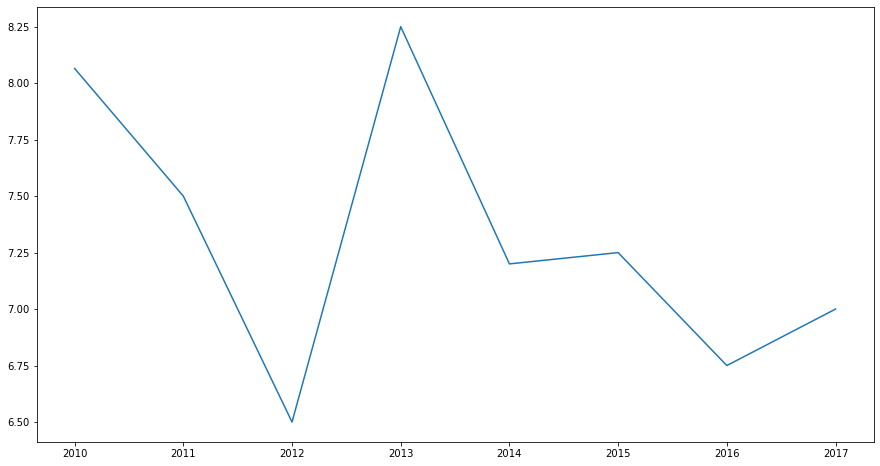

In [385]:
# Verify how the interest rate value scattered across differnt attribues of the dataset
fig, ax = plt.subplots(figsize=(15,8))
#ax.scatter(df["Loan_Purpose"], df["Interest_Rate"])
ax.plot(df.groupby("Year")["Interest_Rate"].max())

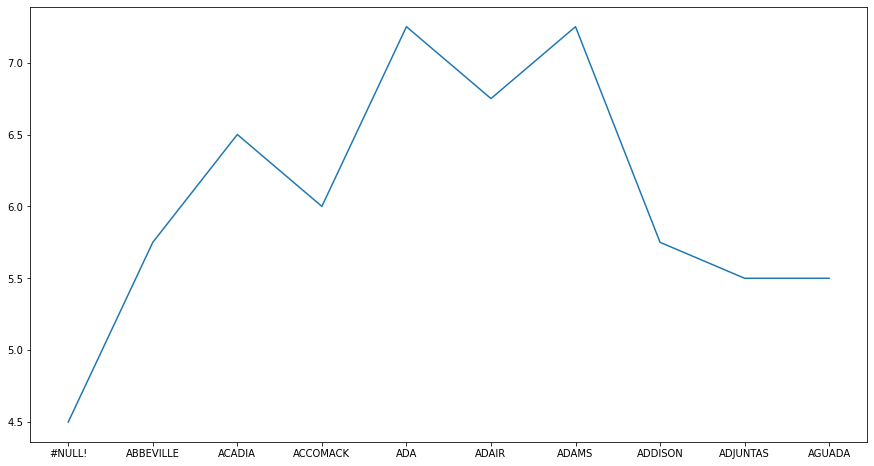

In [390]:
fig, ax = plt.subplots(figsize=(15,8))
#ax.scatter(df["Loan_Purpose"], df["Interest_Rate"])
ax.plot(df.groupby("Property_County")["Interest_Rate"].max().head(10))

# The city and State wise hightest Interest rate per year

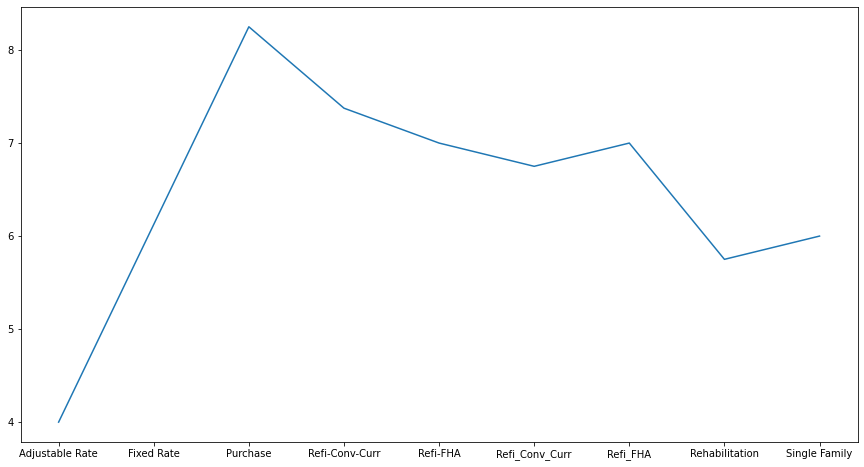

In [391]:
fig, ax = plt.subplots(figsize=(15,8))
#ax.scatter(df["Loan_Purpose"], df["Interest_Rate"])
ax.plot(df.groupby("Loan_Purpose")["Interest_Rate"].max().head(10))

In [371]:
df_interest=pd.DataFrame()
df_interest= df.groupby(["Property_City","Property_State","Year"])["Interest_Rate"].max()
df_interest

Property_City  Property_State  Year
AARONSBURG     PA              2010    5.500
                               2011    5.250
                               2012    4.750
                               2013    3.750
                               2015    3.750
                                       ...  
ZWOLLE         LA              2013    4.500
                               2014    5.125
                               2015    5.250
                               2016    4.875
                               2017    4.500
Name: Interest_Rate, Length: 180832, dtype: float64

## Convert String to Nuremic(machine learning models will not accept non numeric)
### Covert string data type to pandas categories

In [17]:
#  Find the columns with string data type
for labels,content in df_tmp.items() :
    if pd.api.types.is_string_dtype(content) :
        print(labels)
        

Property_State
Property_City
Property_County
Originating_Mortgagee
Originating_Mortgagee_Number
Sponsor_Name
Sponosr_Number
Down_Payment_Source
Non_Profit_Number
Product_Type
Loan_Purpose
Property_Product_Type


In [19]:
# Convert all the non numeric datatype to pandas categories
for labels,content in df_tmp.items() :
    if pd.api.types.is_string_dtype(content) :
        df_tmp[labels]=content.astype("category").cat.as_ordered()

In [20]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9152169 entries, 0 to 17612
Data columns (total 17 columns):
 #   Column                        Dtype   
---  ------                        -----   
 0   Property_State                category
 1   Property_City                 category
 2   Property_County               category
 3   Property_Zip                  int64   
 4   Originating_Mortgagee         category
 5   Originating_Mortgagee_Number  category
 6   Sponsor_Name                  category
 7   Sponosr_Number                category
 8   Down_Payment_Source           category
 9   Non_Profit_Number             category
 10  Product_Type                  category
 11  Loan_Purpose                  category
 12  Property_Product_Type         category
 13  Interest_Rate                 float64 
 14  Mortgage_Amount               int64   
 15  Year                          int64   
 16  Month                         int64   
dtypes: category(12), float64(1), int64(4)
memory usa

In [22]:
df_tmp.Property_State.cat.categories

Index(['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA', 'GU',
       'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME', 'MI',
       'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM', 'NV', 'NY',
       'OH', 'OK', 'OR', 'PA', 'PR', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VA',
       'VI', 'VT', 'WA', 'WI', 'WV', 'WY'],
      dtype='object')

In [23]:
# numeric codes corresponding to each categories
df_tmp.Property_State.cat.codes

0         0
1         0
2         0
3         0
4         0
         ..
17608    53
17609    53
17610    53
17611    53
17612    53
Length: 9152169, dtype: int8

## Checking for  any missing values

In [30]:
df_tmp.isnull().sum()/len(df_tmp)*100

Property_State                   0.000000
Property_City                    0.000000
Property_County                  0.003781
Property_Zip                     0.000000
Originating_Mortgagee            5.489431
Originating_Mortgagee_Number     6.943917
Sponsor_Name                    48.165719
Sponosr_Number                  48.163370
Down_Payment_Source              0.000011
Non_Profit_Number                0.000000
Product_Type                     0.000000
Loan_Purpose                     0.000000
Property_Product_Type            0.000000
Interest_Rate                    0.000000
Mortgage_Amount                  0.000000
Year                             0.000000
Month                            0.000000
dtype: float64

## Fill the numeric missing values

In [33]:
# Identify the numeric columns in the dataset
for label,content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        print(label)

Property_Zip
Interest_Rate
Mortgage_Amount
Year
Month


In [35]:
# check any numeric column having missing values, 
for label,contect in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)
            
# there is no missing values in numeric categories


## filling and converting categorical values in to numeric values

In [39]:
# converting the categorical values to its numeric codes

for label,content in df_tmp.items():
    if not pd.api.types.is_numeric_dtype(content):
        # Add a binaric column to identify the missing row with bootean value
        df_tmp[label+"_is_missing"] = pd.isnull(content)
        #turn categories into number and add +1 to chnage the default -1 value to 0 for missing values
        df_tmp[label]=pd.Categorical(content).codes + 1

In [41]:
df_tmp.head().T


,0,1,2,3,4
Property_State,1,1,1,1,1
Property_City,354,354,354,354,354
Property_County,45,45,45,45,45
Property_Zip,99501,99502,99502,99502,99502
Originating_Mortgagee,16843,0,809,5572,9798
Originating_Mortgagee_Number,761,0,8897,1770,9625
Sponsor_Name,0,1579,76,0,1723
Sponosr_Number,0,244,874,0,107
Down_Payment_Source,7,2,2,2,7
Non_Profit_Number,2282,2282,2282,2282,2282


In [43]:
df_tmp.isnull().sum()

Property_State                             0
Property_City                              0
Property_County                            0
Property_Zip                               0
Originating_Mortgagee                      0
Originating_Mortgagee_Number               0
Sponsor_Name                               0
Sponosr_Number                             0
Down_Payment_Source                        0
Non_Profit_Number                          0
Product_Type                               0
Loan_Purpose                               0
Property_Product_Type                      0
Interest_Rate                              0
Mortgage_Amount                            0
Year                                       0
Month                                      0
Property_State_is_missing                  0
Property_City_is_missing                   0
Property_County_is_missing                 0
Originating_Mortgagee_is_missing           0
Originating_Mortgagee_Number_is_missing    0
Sponsor_Na

# 5.Modeling

## Choose the model based on the scikit learn model selection map https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html


### Split the data into train and validation set based on year. 
#### The training data set contain the data from 2010 to 2016 and the validation set contain the data of 2017





In [48]:
df_tmp.Year.value_counts()

2016    1294373
2012    1266201
2015    1215804
2013    1196400
2017    1176571
2010    1165055
2011    1058312
2014     779453
Name: Year, dtype: int64

In [60]:
df_val = df_tmp[df_tmp.Year > 2016]

In [61]:
df_val.Year.value_counts()

2017    1176571
Name: Year, dtype: int64

In [70]:
df_train =df_tmp[df_tmp.Year < 2017]

In [71]:
df_train.Year.value_counts()

2016    1294373
2012    1266201
2015    1215804
2013    1196400
2010    1165055
2011    1058312
2014     779453
Name: Year, dtype: int64

In [72]:
len(df_val), len(df_train)

(1176571, 7975598)

In [73]:
# split the data in to X and Y
x_train,y_train = df_train.drop("Interest_Rate", axis = 1),df_train.Interest_Rate
x_valid,y_valid = df_val.drop("Interest_Rate", axis = 1 ),df_val.Interest_Rate
x_train.shape,y_train.shape,x_valid.shape,y_valid.shape

((7975598, 28), (7975598,), (1176571, 28), (1176571,))

## Model evaluation


##### RMSLE (root mean square log error ( the percentage in differnce between actual and predicted value) and  mean absolute error (actual values differnece to the actual values )

In [93]:
#creating custom evalution function
from sklearn.metrics import mean_squared_log_error, mean_absolute_error,r2_score

def rmsle(y_test,y_pred):
    """
    Calculate root squared log error between prediction and the test values
    """
    return np.sqrt(mean_squared_log_error(y_test,y_pred))

# create function to compare fifferent evaluation metrics

def score_evaluation(model):
    train_preds= model.predict(x_train)
    val_preds= model.predict(x_valid)
    
    scores = {"Training MAE": mean_absolute_error(y_train,train_preds),
             "Valid MAE": mean_absolute_error(y_valid,val_preds),
             "Traing RMSLE": rmsle(y_train,train_preds),
             "valid_RMSLE":rmsle(y_valid,val_preds),
             "Training Root Square": r2_score(y_train,train_preds),
              "Valid root square": r2_score(y_valid,val_preds)}
    return scores
    

## Fit and train the model using subset of the actual data (max_samples option)
##### Bydefault, the value for max_samples will be NONE which will consume complete data set and n_estimator value will be multiplied with it for evaluation

In [85]:
# Import the model library and initiate the parameters
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_jobs=-1,random_state=42,max_samples=10000)

In [87]:
# Fir the model with train data sets
%%time
model.fit(x_train,y_train)

CPU times: user 30 s, sys: 8.34 s, total: 38.4 s
Wall time: 26.1 s


RandomForestRegressor(max_samples=10000, n_jobs=-1, random_state=42)

In [94]:
# evaluate the scores using the custom fuction
score_evaluation(model)

{'Training MAE': 0.248482823637801,
 'Valid MAE': 0.43092578528622594,
 'Traing RMSLE': 0.06487984698594501,
 'valid_RMSLE': 0.10643303356290192,
 'Training Root Square': 0.6801049212585992,
 'Valid root square': -0.5335726246252055}

## Hyperparamter tuning using RandomizedSearchCV to find the best fit hyperparamter values

In [98]:
%%time
from sklearn.model_selection import RandomizedSearchCV

#Define different RamdomForestRegressor HyperParameters
rf_grid ={"n_estimators":np.arange(10,100,10),
         "max_depth":[None,3,5,10],
         "min_samples_split":np.arange(2,20,2),
         "min_samples_leaf":np.arange(1,20,2),
          "max_features":[0.5,1,"sqrt","Auto"],
          "max_samples":[10000]
         }
# Instantiate model with hyperparameters
rs_model = RandomizedSearchCV(RandomForestRegressor(n_jobs=-1,random_state=42),
                              param_distributions=rf_grid,
                              n_iter=2,
                              cv=5,
                              verbose=True
                                )
# Fit the model with training data                           
rs_model.fit(x_train,y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
CPU times: user 2min 36s, sys: 56.3 s, total: 3min 32s
Wall time: 4min 38s


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   n_iter=2,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'Auto'],
                                        'max_samples': [10000],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [100]:
#finding the best parameters
rs_model.best_params_

{'n_estimators': 10,
 'min_samples_split': 2,
 'min_samples_leaf': 7,
 'max_samples': 10000,
 'max_features': 0.5,
 'max_depth': 10}

In [101]:
#Evaluate the scores using ramdomizedSearchCV
score_evaluation(rs_model)

{'Training MAE': 0.2620498475633716,
 'Valid MAE': 0.43127157977215125,
 'Traing RMSLE': 0.06816140401854266,
 'valid_RMSLE': 0.10702461917440684,
 'Training Root Square': 0.6473375233727432,
 'Valid root square': -0.5552902440632626}

# ideal model fit using best parameter values received from RandomSearchCV



In [105]:
%%time
ideal_model = RandomForestRegressor(n_estimators=40,
                                    min_samples_leaf=1,
                                    min_samples_split=14,
                                    max_features=0.5,
                                    n_jobs=-1,
                                    max_samples=None,
                                    random_state=42)
ideal_model.fit(x_train,y_train)

CPU times: user 29min, sys: 39.1 s, total: 29min 39s
Wall time: 4min 22s


RandomForestRegressor(max_features=0.5, min_samples_split=14, n_estimators=40,
                      n_jobs=-1, random_state=42)

In [107]:
score_evaluation(ideal_model)

{'Training MAE': 0.14567382406786686,
 'Valid MAE': 0.41944521586221556,
 'Traing RMSLE': 0.038929428645615126,
 'valid_RMSLE': 0.10243706795487123,
 'Training Root Square': 0.8859801472087441,
 'Valid root square': -0.40092070546869096}

## Feature importance

### help us to identify which attributes of the data are most important  in predicting the target values(InterestRate)

In [251]:
# find the feature importance using our ideal model, the output values corresponds to each columns in out dataset
ideal_model.feature_importances_

array([1.59492460e-02, 2.45248689e-02, 2.11090163e-02, 4.24477497e-02,
       4.96760356e-02, 4.70510803e-02, 2.08519104e-02, 2.51068960e-02,
       8.07235627e-03, 1.63712447e-03, 4.51482639e-02, 1.94856517e-02,
       6.21167615e-03, 4.75837791e-02, 5.23560462e-01, 9.59621685e-02,
       0.00000000e+00, 0.00000000e+00, 2.90874433e-06, 5.67725296e-04,
       4.65545471e-04, 3.02104941e-03, 1.56447925e-03, 7.09073298e-09,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00])

In [301]:
# visualize the feature importance in graph
def view_feature_imp (columns,importance,n=5):
        df_plot = (pd.DataFrame({"features":columns,"Feature_importance":importance,}).sort_values("Feature_importance",ascending=False)
                                                                                      .reset_index(drop=True))
        
        # Plot the dataframe
        
        fig, ax = plt.subplots(figsize=(15,8))
        plt.figure(figsize=(10, 500))
        ax.bar(df_plot["features"][:n],df_plot["Feature_importance"][:n])
        ax.set_xlabel("Features")
        ax.set_ylabel("Feature_importance")
        
    

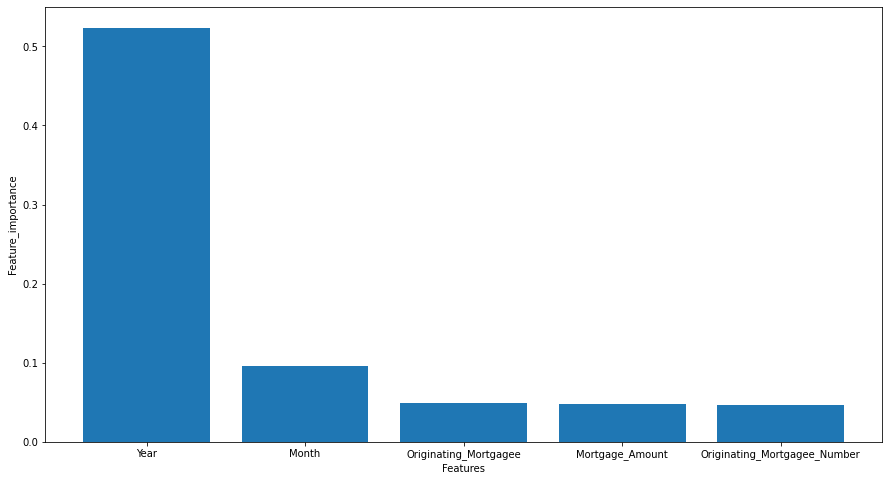

<Figure size 720x36000 with 0 Axes>

In [302]:
view_feature_imp(x_train.columns,ideal_model.feature_importances_)

# Indidate that the Year,Month and Orihinating Mortgagee are most influencing features of InterRate

# Make predictions on test data

In [114]:
# find the test file names using the python os library
os.chdir('../Test_data')
path = os.getcwd()
test_files = os.listdir(path)

In [112]:
pwd

'/Users/sujithchennat/Desktop/bigdata/Data/Test_data'

In [115]:
test_files

['FHA_SFSnapshot_1020.xlsx',
 'FHA_SFSnapshot_0518.xlsx',
 'FHA_SFSnapshot_0220.xlsx',
 'FHA_SFSnapshot_0918.xlsx',
 'FHA_SFSnapshot_0719.xlsx',
 'FHA_SFSnapshot_1220.xlsx',
 'FHA_SFSnapshot_0718.xlsx',
 'FHA_SFSnapshot_0919.xlsx',
 'FHA_SFSnapshot_0221.xlsx',
 'FHA_SFSnapshot_0519.xlsx',
 'FHA_SFSnapshot_0119.xlsx',
 'FHA_SFSnapshot_0621.xlsx',
 'FHA_SFSnapshot_0820.xlsx',
 'FHA_SFSnapshot_0318.xlsx',
 'FHA_SFSnapshot_1118.xlsx',
 'FHA_SFSnapshot_0420.xlsx',
 'FHA_SFSnapshot_0421.xlsx',
 'FHA_SFSnapshot_1119.xlsx',
 'FHA_SFSnapshot_0319.xlsx',
 'FHA_SFSnapshot_0620.xlsx',
 'FHA_SFSnapshot_0118.xlsx',
 'FHA_SFSnapshot_0619.xlsx',
 'FHA_SFSnapshot_0121.xlsx',
 'FHA_SFSnapshot_0418.xlsx',
 'FHA_SFSnapshot_1120.xlsx',
 'FHA_SFSnapshot_0818.xlsx',
 'FHA_SFSnapshot_0320.xlsx',
 'FHA_SFSnapshot_0321.xlsx',
 'FHA_SFSnapshot_0819.xlsx',
 'FHA_SFSnapshot_0419.xlsx',
 'FHA_SFSnapshot_0120.xlsx',
 'FHA_SFSnapshot_0618.xlsx',
 'FHA_SFSnapshot_0218.xlsx',
 'FHA_SFSnapshot_0920.xlsx',
 'FHA_SFSnapsh

In [212]:
# load the test files to panda Dataframe one by one using python script
df_test = pd.DataFrame()
for file in test_files:
    xls = pd.ExcelFile(file)
   
    df_list = [pd.read_excel(xls, i) for i in xls.sheet_names]
    df_test = df_test.append(pd.DataFrame(df_list[2]))
    df_test = df_test.append(pd.DataFrame(df_list[3]))
    print(df_test)

      Property_State Property_City Property_County  Property_Zip  \
0                 AK     ANCHORAGE       ANCHORAGE         99501   
1                 AK     ANCHORAGE       ANCHORAGE         99501   
2                 AK     ANCHORAGE       ANCHORAGE         99501   
3                 AK     ANCHORAGE       ANCHORAGE         99502   
4                 AK     ANCHORAGE       ANCHORAGE         99502   
...              ...           ...             ...           ...   
40677             WY   GREEN RIVER      SWEETWATER         82935   
40678             WY      SUPERIOR      SWEETWATER         82945   
40679             WY       WORLAND        WASHAKIE         82401   
40680             WY     NEWCASTLE          WESTON         82701   
40681             WY     NEWCASTLE          WESTON         82701   

                        Originating_Mortgagee Originating_Mortgagee_Number  \
0      MORTGAGE BROKERS OF ALASKA CORPORATION                Not Available   
1                    RESIDE

      Property_State Property_City Property_County  Property_Zip  \
0                 AK     ANCHORAGE       ANCHORAGE         99501   
1                 AK     ANCHORAGE       ANCHORAGE         99501   
2                 AK     ANCHORAGE       ANCHORAGE         99501   
3                 AK     ANCHORAGE       ANCHORAGE         99502   
4                 AK     ANCHORAGE       ANCHORAGE         99502   
...              ...           ...             ...           ...   
42498             WY  ROCK SPRINGS      SWEETWATER         82901   
42499             WY        FARSON      SWEETWATER         82932   
42500             WY        FARSON      SWEETWATER         82932   
42501             WY        WILSON           TETON         83014   
42502             WY    BEAR RIVER           UINTA         82930   

                        Originating_Mortgagee Originating_Mortgagee_Number  \
0      MORTGAGE BROKERS OF ALASKA CORPORATION                Not Available   
1                    RESIDE

      Property_State Property_City Property_County  Property_Zip  \
0                 AK     ANCHORAGE       ANCHORAGE         99501   
1                 AK     ANCHORAGE       ANCHORAGE         99501   
2                 AK     ANCHORAGE       ANCHORAGE         99501   
3                 AK     ANCHORAGE       ANCHORAGE         99502   
4                 AK     ANCHORAGE       ANCHORAGE         99502   
...              ...           ...             ...           ...   
26071             WY   GREEN RIVER      SWEETWATER         82935   
26072             WY        WILSON           TETON         83014   
26073             WY      EVANSTON           UINTA         82930   
26074             WY     NEWCASTLE          WESTON         82701   
26075             WY         UPTON          WESTON         82730   

                        Originating_Mortgagee Originating_Mortgagee_Number  \
0      MORTGAGE BROKERS OF ALASKA CORPORATION                Not Available   
1                    RESIDE

      Property_State Property_City Property_County  Property_Zip  \
0                 AK     ANCHORAGE       ANCHORAGE         99501   
1                 AK     ANCHORAGE       ANCHORAGE         99501   
2                 AK     ANCHORAGE       ANCHORAGE         99501   
3                 AK     ANCHORAGE       ANCHORAGE         99502   
4                 AK     ANCHORAGE       ANCHORAGE         99502   
...              ...           ...             ...           ...   
15010             WY  ROCK SPRINGS      SWEETWATER         82901   
15011             WY   GREEN RIVER      SWEETWATER         82935   
15012             WY      EVANSTON           UINTA         82930   
15013             WY      EVANSTON           UINTA         82930   
15014             WY       WORLAND        WASHAKIE         82401   

                        Originating_Mortgagee Originating_Mortgagee_Number  \
0      MORTGAGE BROKERS OF ALASKA CORPORATION                Not Available   
1                    RESIDE

      Property_State  Property_City Property_County  Property_Zip  \
0                 AK      ANCHORAGE       ANCHORAGE         99501   
1                 AK      ANCHORAGE       ANCHORAGE         99501   
2                 AK      ANCHORAGE       ANCHORAGE         99501   
3                 AK      ANCHORAGE       ANCHORAGE         99502   
4                 AK      ANCHORAGE       ANCHORAGE         99502   
...              ...            ...             ...           ...   
54049             WY    GREEN RIVER      SWEETWATER         82935   
54050             WY    GREEN RIVER      SWEETWATER         82935   
54051             WY          LYMAN           UINTA         82937   
54052             WY  MOUNTAIN VIEW           UINTA         82939   
54053             WY  MOUNTAIN VIEW           UINTA         82939   

                        Originating_Mortgagee Originating_Mortgagee_Number  \
0      MORTGAGE BROKERS OF ALASKA CORPORATION                Not Available   
1              

      Property_State Property_City Property_County  Property_Zip  \
0                 AK     ANCHORAGE       ANCHORAGE         99501   
1                 AK     ANCHORAGE       ANCHORAGE         99501   
2                 AK     ANCHORAGE       ANCHORAGE         99501   
3                 AK     ANCHORAGE       ANCHORAGE         99502   
4                 AK     ANCHORAGE       ANCHORAGE         99502   
...              ...           ...             ...           ...   
16053             WY     BIG PINEY        SUBLETTE         83113   
16054             WY   GREEN RIVER      SWEETWATER         82935   
16055             WY    BEAR RIVER           UINTA         82930   
16056             WY       WORLAND        WASHAKIE         82401   
16057             WY       WORLAND        WASHAKIE         82401   

                        Originating_Mortgagee Originating_Mortgagee_Number  \
0      MORTGAGE BROKERS OF ALASKA CORPORATION                Not Available   
1                    RESIDE

      Property_State  Property_City Property_County  Property_Zip  \
0                 AK      ANCHORAGE       ANCHORAGE         99501   
1                 AK      ANCHORAGE       ANCHORAGE         99501   
2                 AK      ANCHORAGE       ANCHORAGE         99501   
3                 AK      ANCHORAGE       ANCHORAGE         99502   
4                 AK      ANCHORAGE       ANCHORAGE         99502   
...              ...            ...             ...           ...   
42206             WY       EVANSTON           UINTA         82930   
42207             WY       EVANSTON           UINTA         82930   
42208             WY  MOUNTAIN VIEW           UINTA         82939   
42209             WY  MOUNTAIN VIEW           UINTA         82939   
42210             WY      NEWCASTLE          WESTON         82701   

                        Originating_Mortgagee Originating_Mortgagee_Number  \
0      MORTGAGE BROKERS OF ALASKA CORPORATION                Not Available   
1              

      Property_State  Property_City Property_County  Property_Zip  \
0                 AK      ANCHORAGE       ANCHORAGE         99501   
1                 AK      ANCHORAGE       ANCHORAGE         99501   
2                 AK      ANCHORAGE       ANCHORAGE         99501   
3                 AK      ANCHORAGE       ANCHORAGE         99502   
4                 AK      ANCHORAGE       ANCHORAGE         99502   
...              ...            ...             ...           ...   
15708             WY    GREEN RIVER      SWEETWATER         82935   
15709             WY    GREEN RIVER      SWEETWATER         82935   
15710             WY   FORT BRIDGER           UINTA         82933   
15711             WY  MOUNTAIN VIEW           UINTA         82939   
15712             WY        WORLAND        WASHAKIE         82401   

                        Originating_Mortgagee Originating_Mortgagee_Number  \
0      MORTGAGE BROKERS OF ALASKA CORPORATION                Not Available   
1              

      Property_State Property_City Property_County  Property_Zip  \
0                 AK     ANCHORAGE       ANCHORAGE         99501   
1                 AK     ANCHORAGE       ANCHORAGE         99501   
2                 AK     ANCHORAGE       ANCHORAGE         99501   
3                 AK     ANCHORAGE       ANCHORAGE         99502   
4                 AK     ANCHORAGE       ANCHORAGE         99502   
...              ...           ...             ...           ...   
60663             WY         LYMAN           UINTA         82937   
60664             WY       WORLAND        WASHAKIE         82401   
60665             WY       WORLAND        WASHAKIE         82401   
60666             WY       WORLAND        WASHAKIE         82401   
60667             WY         UPTON          WESTON         82730   

                        Originating_Mortgagee Originating_Mortgagee_Number  \
0      MORTGAGE BROKERS OF ALASKA CORPORATION                Not Available   
1                    RESIDE

      Property_State Property_City Property_County  Property_Zip  \
0                 AK     ANCHORAGE       ANCHORAGE         99501   
1                 AK     ANCHORAGE       ANCHORAGE         99501   
2                 AK     ANCHORAGE       ANCHORAGE         99501   
3                 AK     ANCHORAGE       ANCHORAGE         99502   
4                 AK     ANCHORAGE       ANCHORAGE         99502   
...              ...           ...             ...           ...   
17325             WY  ROCK SPRINGS      SWEETWATER         82901   
17326             WY   GREEN RIVER      SWEETWATER         82935   
17327             WY      EVANSTON           UINTA         82930   
17328             WY         LYMAN           UINTA         82937   
17329             WY       WORLAND        WASHAKIE         82401   

                        Originating_Mortgagee Originating_Mortgagee_Number  \
0      MORTGAGE BROKERS OF ALASKA CORPORATION                Not Available   
1                    RESIDE

      Property_State Property_City Property_County Property_Zip  \
0                 AK     ANCHORAGE       ANCHORAGE        99501   
1                 AK     ANCHORAGE       ANCHORAGE        99501   
2                 AK     ANCHORAGE       ANCHORAGE        99501   
3                 AK     ANCHORAGE       ANCHORAGE        99502   
4                 AK     ANCHORAGE       ANCHORAGE        99502   
...              ...           ...             ...          ...   
24983             WY   GREEN RIVER      SWEETWATER        82935   
24984             WY   GREEN RIVER      SWEETWATER        82935   
24985             WY      EVANSTON           UINTA        82930   
24986             WY      EVANSTON           UINTA        82930   
24987             WY    BEAR RIVER           UINTA        82930   

                        Originating_Mortgagee Originating_Mortgagee_Number  \
0      MORTGAGE BROKERS OF ALASKA CORPORATION                Not Available   
1                    RESIDENTIAL MORTGA

      Property_State  Property_City Property_County Property_Zip  \
0                 AK      ANCHORAGE       ANCHORAGE        99501   
1                 AK      ANCHORAGE       ANCHORAGE        99501   
2                 AK      ANCHORAGE       ANCHORAGE        99501   
3                 AK      ANCHORAGE       ANCHORAGE        99502   
4                 AK      ANCHORAGE       ANCHORAGE        99502   
...              ...            ...             ...          ...   
47113             WY       EVANSTON           UINTA        82930   
47114             WY          LYMAN           UINTA        82937   
47115             WY          LYMAN           UINTA        82937   
47116             WY  MOUNTAIN VIEW           UINTA        82939   
47117             WY      NEWCASTLE          WESTON        82701   

                        Originating_Mortgagee Originating_Mortgagee_Number  \
0      MORTGAGE BROKERS OF ALASKA CORPORATION                Not Available   
1                    RESIDE

      Property_State  Property_City Property_County Property_Zip  \
0                 AK      ANCHORAGE       ANCHORAGE        99501   
1                 AK      ANCHORAGE       ANCHORAGE        99501   
2                 AK      ANCHORAGE       ANCHORAGE        99501   
3                 AK      ANCHORAGE       ANCHORAGE        99502   
4                 AK      ANCHORAGE       ANCHORAGE        99502   
...              ...            ...             ...          ...   
40155             WY    GREEN RIVER      SWEETWATER        82935   
40156             WY    GREEN RIVER      SWEETWATER        82935   
40157             WY    GREEN RIVER      SWEETWATER        82935   
40158             WY  MOUNTAIN VIEW           UINTA        82939   
40159             WY  MOUNTAIN VIEW           UINTA        82939   

                        Originating_Mortgagee Originating_Mortgagee_Number  \
0      MORTGAGE BROKERS OF ALASKA CORPORATION                Not Available   
1                    RESIDE

      Property_State Property_City Property_County Property_Zip  \
0                 AK     ANCHORAGE       ANCHORAGE        99501   
1                 AK     ANCHORAGE       ANCHORAGE        99501   
2                 AK     ANCHORAGE       ANCHORAGE        99501   
3                 AK     ANCHORAGE       ANCHORAGE        99502   
4                 AK     ANCHORAGE       ANCHORAGE        99502   
...              ...           ...             ...          ...   
46891             WY  ROCK SPRINGS      SWEETWATER        82901   
46892             WY   GREEN RIVER      SWEETWATER        82935   
46893             WY      EVANSTON           UINTA        82930   
46894             WY  FORT BRIDGER           UINTA        82933   
46895             WY     NEWCASTLE          WESTON        82701   

                        Originating_Mortgagee Originating_Mortgagee_Number  \
0      MORTGAGE BROKERS OF ALASKA CORPORATION                Not Available   
1                    RESIDENTIAL MORTGA

      Property_State  Property_City Property_County Property_Zip  \
0                 AK      ANCHORAGE       ANCHORAGE        99501   
1                 AK      ANCHORAGE       ANCHORAGE        99501   
2                 AK      ANCHORAGE       ANCHORAGE        99501   
3                 AK      ANCHORAGE       ANCHORAGE        99502   
4                 AK      ANCHORAGE       ANCHORAGE        99502   
...              ...            ...             ...          ...   
30855             WY       EVANSTON           UINTA        82930   
30856             WY          LYMAN           UINTA        82937   
30857             WY          LYMAN           UINTA        82937   
30858             WY  MOUNTAIN VIEW           UINTA        82939   
30859             WY      NEWCASTLE          WESTON        82701   

                        Originating_Mortgagee Originating_Mortgagee_Number  \
0      MORTGAGE BROKERS OF ALASKA CORPORATION                Not Available   
1                    RESIDE

      Property_State  Property_City Property_County Property_Zip  \
0                 AK      ANCHORAGE       ANCHORAGE        99501   
1                 AK      ANCHORAGE       ANCHORAGE        99501   
2                 AK      ANCHORAGE       ANCHORAGE        99501   
3                 AK      ANCHORAGE       ANCHORAGE        99502   
4                 AK      ANCHORAGE       ANCHORAGE        99502   
...              ...            ...             ...          ...   
51353             WY     BEAR RIVER           UINTA        82930   
51354             WY       EVANSTON           UINTA        82930   
51355             WY       EVANSTON           UINTA        82930   
51356             WY       EVANSTON           UINTA        82930   
51357             WY  MOUNTAIN VIEW           UINTA        82939   

                        Originating_Mortgagee Originating_Mortgagee_Number  \
0      MORTGAGE BROKERS OF ALASKA CORPORATION                Not Available   
1                    RESIDE

      Property_State Property_City Property_County Property_Zip  \
0                 AK     ANCHORAGE       ANCHORAGE        99501   
1                 AK     ANCHORAGE       ANCHORAGE        99501   
2                 AK     ANCHORAGE       ANCHORAGE        99501   
3                 AK     ANCHORAGE       ANCHORAGE        99502   
4                 AK     ANCHORAGE       ANCHORAGE        99502   
...              ...           ...             ...          ...   
21710             WY        CASPER         NATRONA        82609   
21711             WY          LUSK        NIOBRARA        82225   
21712             WY  ROCK SPRINGS      SWEETWATER        82901   
21713             WY       JACKSON           TETON        83001   
21714             WY      EVANSTON           UINTA        82930   

                        Originating_Mortgagee Originating_Mortgagee_Number  \
0      MORTGAGE BROKERS OF ALASKA CORPORATION                Not Available   
1                    RESIDENTIAL MORTGA

      Property_State Property_City Property_County Property_Zip  \
0                 AK     ANCHORAGE       ANCHORAGE        99501   
1                 AK     ANCHORAGE       ANCHORAGE        99501   
2                 AK     ANCHORAGE       ANCHORAGE        99501   
3                 AK     ANCHORAGE       ANCHORAGE        99502   
4                 AK     ANCHORAGE       ANCHORAGE        99502   
...              ...           ...             ...          ...   
37512             WY   GREEN RIVER      SWEETWATER        82935   
37513             WY   GREEN RIVER      SWEETWATER        82935   
37514             WY   GREEN RIVER      SWEETWATER        82935   
37515             WY   GREEN RIVER      SWEETWATER        82935   
37516             WY      EVANSTON           UINTA        82930   

                        Originating_Mortgagee Originating_Mortgagee_Number  \
0      MORTGAGE BROKERS OF ALASKA CORPORATION                Not Available   
1                    RESIDENTIAL MORTGA

      Property_State Property_City Property_County Property_Zip  \
0                 AK     ANCHORAGE       ANCHORAGE        99501   
1                 AK     ANCHORAGE       ANCHORAGE        99501   
2                 AK     ANCHORAGE       ANCHORAGE        99501   
3                 AK     ANCHORAGE       ANCHORAGE        99502   
4                 AK     ANCHORAGE       ANCHORAGE        99502   
...              ...           ...             ...          ...   
43445             WY   GREEN RIVER      SWEETWATER        82935   
43446             WY   GREEN RIVER      SWEETWATER        82935   
43447             WY   GREEN RIVER      SWEETWATER        82935   
43448             WY      EVANSTON           UINTA        82930   
43449             WY  FORT BRIDGER           UINTA        82933   

                        Originating_Mortgagee Originating_Mortgagee_Number  \
0      MORTGAGE BROKERS OF ALASKA CORPORATION                Not Available   
1                    RESIDENTIAL MORTGA

      Property_State Property_City Property_County Property_Zip  \
0                 AK     ANCHORAGE       ANCHORAGE        99501   
1                 AK     ANCHORAGE       ANCHORAGE        99501   
2                 AK     ANCHORAGE       ANCHORAGE        99501   
3                 AK     ANCHORAGE       ANCHORAGE        99502   
4                 AK     ANCHORAGE       ANCHORAGE        99502   
...              ...           ...             ...          ...   
15189             WY   GREEN RIVER      SWEETWATER        82935   
15190             WY      EVANSTON           UINTA        82930   
15191             WY         LYMAN           UINTA        82937   
15192             WY       WORLAND        WASHAKIE        82401   
15193             WY     NEWCASTLE          WESTON        82701   

                        Originating_Mortgagee Originating_Mortgagee_Number  \
0      MORTGAGE BROKERS OF ALASKA CORPORATION                Not Available   
1                    RESIDENTIAL MORTGA

      Property_State Property_City Property_County Property_Zip  \
0                 AK     ANCHORAGE       ANCHORAGE        99501   
1                 AK     ANCHORAGE       ANCHORAGE        99501   
2                 AK     ANCHORAGE       ANCHORAGE        99501   
3                 AK     ANCHORAGE       ANCHORAGE        99502   
4                 AK     ANCHORAGE       ANCHORAGE        99502   
...              ...           ...             ...          ...   
51881             WY      EVANSTON           UINTA        82930   
51882             WY  FORT BRIDGER           UINTA        82933   
51883             WY         LYMAN           UINTA        82937   
51884             WY       WORLAND        WASHAKIE        82401   
51885             WY     NEWCASTLE          WESTON        82701   

                        Originating_Mortgagee Originating_Mortgagee_Number  \
0      MORTGAGE BROKERS OF ALASKA CORPORATION                Not Available   
1                    RESIDENTIAL MORTGA

## Preprocessing the test data to change it in to the same format of train data

In [213]:
# Verify any null values
df_test.isna().sum()

Property_State                   0
Property_City                    0
Property_County                 51
Property_Zip                     0
Originating_Mortgagee            0
Originating_Mortgagee_Number     0
Sponsor_Name                     0
Sponosr_Number                   0
Down_Payment_Source              0
Non_Profit_Number                0
Product_Type                     0
Loan_Purpose                     0
Property_Product_Type            0
Interest_Rate                    0
Mortgage_Amount                  0
Year                             0
Month                            0
dtype: int64

In [222]:
# Verify the object type of test data set
df_test.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 4152663 entries, 0 to 15003
Data columns (total 17 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   Property_State                object 
 1   Property_City                 object 
 2   Property_County               object 
 3   Property_Zip                  int64  
 4   Originating_Mortgagee         object 
 5   Originating_Mortgagee_Number  object 
 6   Sponsor_Name                  object 
 7   Sponosr_Number                object 
 8   Down_Payment_Source           object 
 9   Non_Profit_Number             object 
 10  Product_Type                  object 
 11  Loan_Purpose                  object 
 12  Property_Product_Type         object 
 13  Interest_Rate                 float64
 14  Mortgage_Amount               int64  
 15  Year                          int64  
 16  Month                         int64  
dtypes: float64(1), int64(4), object(12)
memory usage: 570.3+ MB


In [223]:
# creating function to preprocess the datasets
#As our data not have only one column having missing values and there is no missing values in numeric data,
#we can convert the string to categories and transform them to category code +1 value to habdle missing values

def preprocess_data(dft):
    """
    Performe the precessing transformation on dataset which can fit to a model and return the transformed dataset  
    """
    for labels,content in dft.items() :  
        
        if not pd.api.types.is_numeric_dtype(content):
            # Add a binaric column to identify the missing row with bootean value
            dft[labels+"_is_missing"] = pd.isnull(content)
            #turn categories into number and add +1 to chnage the default -1 value to 0 for missing values
            #dft[labels]=content.astype("category").cat.as_ordered()
            dft[labels]=pd.Categorical(content).codes + 1
        
    return dft

In [224]:
#Process the test data

df_test = preprocess_data(df_test)



In [374]:
# verify the train data set the of same columns
set(x_train.columns) -set(df_test.columns)

set()

In [237]:
# Delete the interest rate column from the test data set to fit with the trained model which do not have interest code
x_test1,y_test1 = df_test.drop("Interest_Rate", axis = 1),df_test.Interest_Rate

In [238]:
# predict the results
test_preds = ideal_model.predict(x_test1)

In [239]:
test_preds

array([3.82562972, 3.76834599, 3.80037142, ..., 3.53171822, 4.34715758,
       4.17879917])

In [243]:
final_pred = pd.DataFrame()

In [245]:
# add more column to analyse the results
final_pred["Property_State"] = df_test["Property_State"]
final_pred["Interest_Rate"] = test_preds

In [248]:
final_pred["actual_interest_rate"]= y_test1

In [249]:
final_pred

,Property_State,Interest_Rate,actual_interest_rate
0,1,3.825630,2.250
1,1,3.768346,2.750
2,1,3.800371,2.250
3,1,3.772337,2.750
4,1,3.803497,2.750
...,...,...,...
14999,54,4.311714,4.250
15000,54,4.385624,4.990
15001,54,3.531718,3.875
15002,54,4.347158,4.875


# 6.Conclusion 

As per the differnt validation matrices we generated using our fine tuned model using a subset of data from the actual trained data, we obtained very good results in terms of the RMSLE and MAE values which are minimal.

We can improve the results by processing the complete data set and incresing the iterations of the model execution.

Also we can implement differnet machine learning model and compare the results before our final prediction.

MSE:- measures how far the data are from the model’s predicted values.
RMSLE :- Root Mean Squared Error of the log-transformed predicted and log-transformed actual values.

'Training MAE': 0.14567382406786686,
 'Valid MAE': 0.41944521586221556,
 'Traing RMSLE': 0.038929428645615126,
 'valid_RMSLE': 0.10243706795487123,
 'Training Root Square': 0.8859801472087441,
 'Valid root square': -0.40092070546869096}